In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('carprices.csv')

In [3]:
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [4]:
df.isna().sum()

Mileage          0
Age(yrs)         0
Sell Price($)    0
dtype: int64

## Checking For Linear Relationship

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

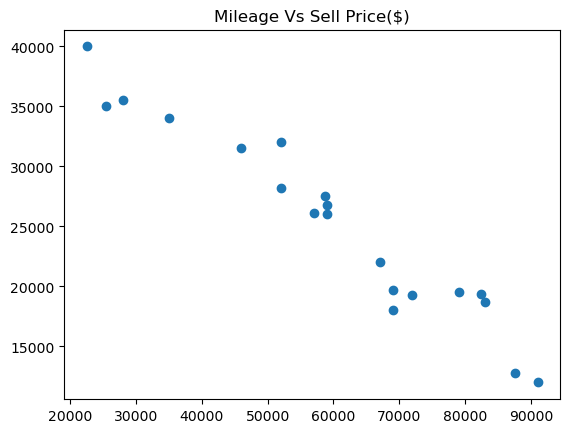

In [5]:
plt.scatter(x = df['Mileage'],y=df['Sell Price($)'])
plt.title('Mileage Vs Sell Price($)')
plt.plot

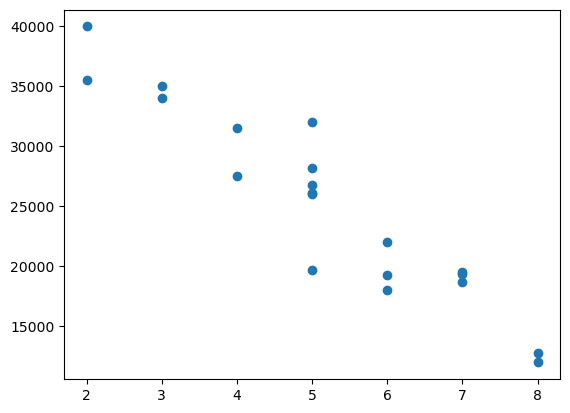

In [6]:
plt.scatter(x = df['Age(yrs)'],y=df['Sell Price($)'])

In [7]:
reg = LinearRegression()

In [8]:
reg.fit(df[['Mileage','Age(yrs)']].values,df['Sell Price($)'])

LinearRegression()

In [9]:
y_predict = reg.predict(df[['Mileage','Age(yrs)']])

C:\Users\APU\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [10]:
residuals = y_predict - df['Sell Price($)'].values

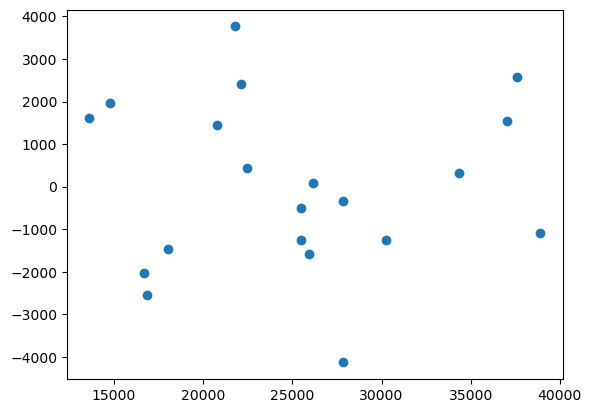

In [11]:
#Plotting Residuals vs Fitted Values Plot (homoscedasticity)
plt.scatter(x = y_predict,y=residuals)
plt.show()

C:\Users\APU\AppData\Local\Temp\ipykernel_1332\203471438.py:2: RuntimeWarning: invalid value encountered in sqrt
  residuals = np.sqrt(residuals)


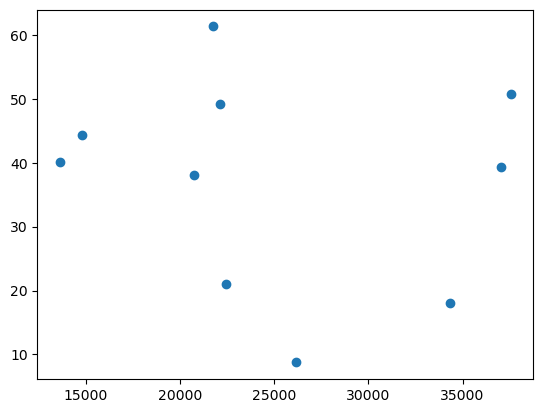

In [12]:
#Independence of Residuals
residuals = np.sqrt(residuals)
plt.scatter(x = y_predict,y=residuals)
plt.show()

In [13]:
x_train,x_test,y_train,y_test = train_test_split(df[['Mileage','Age(yrs)']],df['Sell Price($)'],test_size = 0.2)

In [14]:
x_train,y_train,x_test,y_test

(    Mileage  Age(yrs)
 5     59000         5
 10    83000         7
 4     46000         4
 17    69000         5
 6     52000         5
 11    79000         7
 13    58780         4
 16    28000         2
 19    52000         5
 2     57000         5
 8     91000         8
 14    82450         7
 1     35000         3
 18    87600         8
 15    25400         3
 9     67000         6,
 5     26750
 10    18700
 4     31500
 17    19700
 6     32000
 11    19500
 13    27500
 16    35500
 19    28200
 2     26100
 8     12000
 14    19400
 1     34000
 18    12800
 15    35000
 9     22000
 Name: Sell Price($), dtype: int64,
     Mileage  Age(yrs)
 0     69000         6
 3     22500         2
 7     72000         6
 12    59000         5,
 0     18000
 3     40000
 7     19300
 12    26000
 Name: Sell Price($), dtype: int64)

In [15]:
reg.fit(x_train,y_train)

LinearRegression()

In [16]:
reg.predict(x_test)

array([22105.87503928, 38595.19091588, 21130.99214472, 25700.14244054])

In [17]:
y_test

0     18000
3     40000
7     19300
12    26000
Name: Sell Price($), dtype: int64

In [18]:
reg.score(x_test,y_test)

0.9269143028997003